# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. And from Part 2, BA Edition.
- Note: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network.

### Week 3 Part 1.a)
**Exercises: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.**

- **What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**  
  - There is more clustering in real-world networks that is not accounted for in a random network. A random network "underestimates the size and the frequency of high-degree nodes." The random network predicts many nodes close to ⟨k⟩, but in reality, many nodes have higher or lower degrees. Few nodes lie near the average.

- **List the four regimes that characterize random networks as a function of ⟨k⟩**  
If ⟨k⟩ > 1 we have a large component.
  - *Subcritical Regime*:  
    - $0 < ⟨k⟩ < 1 \quad (p < 1/N)$  
    - For ⟨k⟩ = 0 the network consists of N isolated nodes  
    - For ⟨k⟩ < 1 we observe many tiny clusters  
  - *Critical Point*:  
    - $⟨k⟩ = 1 \quad (p = 1/N)$  
    - The critical point separates the regime where there is not yet a giant component (⟨k⟩ < 1) from the regime where there is one (⟨k⟩ > 1)  
  - *Supercritical Regime*:  
    - $⟨k⟩ > 1 \quad (p > 1/N)$  
    - The network now has a giant component that looks like a real network  
    - Numerous isolated components coexist with the giant component  
    - The supercritical regime lasts until all nodes are absorbed by the giant component  
  - *Connected Regime*:  
    - $⟨k⟩ > \ln N \quad (p > \ln N / N)$  
    - For sufficiently large p the giant component absorbs all nodes, so $N_G \simeq N$  
    - The network becomes a complete graph only at ⟨k⟩ = N - 1, but it remains sparse until this point  

- **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?**  
  - In a random network, when the average degree of nodes decreases, clustering also decreases, since each connection is equally likely to go to a faraway node as to a nearby one.
  - In a real-world network, connecting to a neighbor or a neighbor’s neighbor still has a high probability. So even when the degree decreases (fewer connections), clusters persist. Connections are still made within the same local neighborhoods, just with fewer overall links.  


### Week 3 Part 1.b)
**Exercises: WS edition.**
- **First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,and 1**
- **Calculate the average shortest path length ⟨d⟩ for each one.**

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

n = 500
k = 4 # average degree, neighbours neighbour on each side
p = [0, 0.1, 1] # The probability of rewiring each edge

# create 3 graphs with different rewiring probabilities
G1 = nx.watts_strogatz_graph(n,k,p[0],seed=42)
G2 = nx.watts_strogatz_graph(n,k,p[1],seed=42)
G3 = nx.watts_strogatz_graph(n,k,p[2],seed=42)

# Calculate the average shortest path length ⟨d⟩ for each one
d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)
d3 = nx.average_shortest_path_length(G3)

# Print the results
print(f"Average shortest path length for p={p[0]}: {d1}")
print(f"Average shortest path length for p={p[1]}: {d2}")
print(f"Average shortest path length for p={p[2]}: {d3}")

Average shortest path length for p=0: 62.875751503006015
Average shortest path length for p=0.1: 8.340905811623246
Average shortest path length for p=1: 4.726845691382765


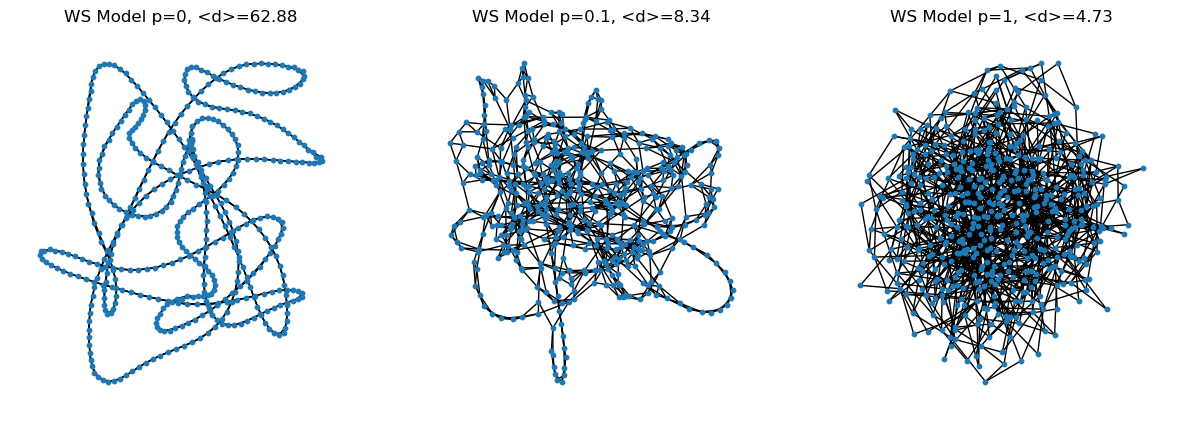

In [2]:
# plot the graphs
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
nx.draw(G1, node_size=10)
plt.title(f'WS Model p={p[0]}, <d>={d1:.2f}')
plt.subplot(1,3,2)
nx.draw(G2, node_size=10)
plt.title(f'WS Model p={p[1]}, <d>={d2:.2f}')
plt.subplot(1,3,3)
nx.draw(G3, node_size=10)
plt.title(f'WS Model p={p[2]}, <d>={d3:.2f}')
plt.show()

- **Describe what happens to the network when p=1**

For p = 1 all links have been rewired, so the network turns into a random network (Box 3.9)

- **Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0**

In [3]:
# Generate a lot of networks with different values of p
p = np.linspace(0.05, 1, 50)
avg_path_lengths = []
for prob in p:
    G = nx.watts_strogatz_graph(n, k, prob, seed=42)
    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)


- **What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network (value of 4-6 (see chapter 3.8-3.9)).**

The average shortest path first goes below 6 at p = 0.224, with length = 5.977


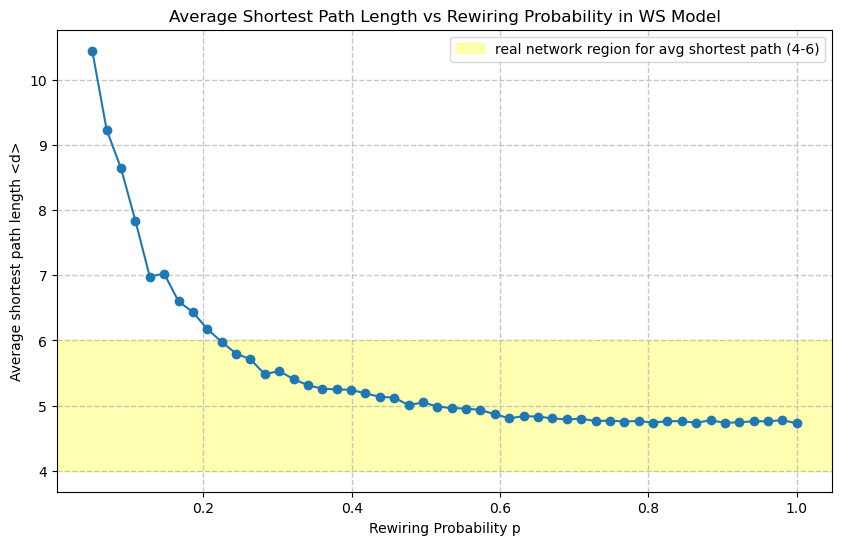

In [4]:
avg_path_lengths = np.array(avg_path_lengths)
p = np.array(p)

# Find the first index where the path length is <= 6
idx = np.where(avg_path_lengths <= 6)[0][0]
print(f"The average shortest path first goes below 6 at p = {p[idx]:.3f}, with length = {avg_path_lengths[idx]:.3f}")
plt.figure(figsize=(10, 6))
plt.plot(p, avg_path_lengths, marker='o')
plt.xlabel('Rewiring Probability p')
plt.ylabel("Average shortest path length <d>")
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model')
plt.grid(True, which='major', axis='both', linestyle='--', linewidth=1, alpha=0.7)
# Mark the area between 4 and 6
plt.axhspan(4, 6, color='yellow', alpha=0.3, label='real network region for avg shortest path (4-6)')
plt.legend()
plt.show()

The plot shows the relationship between *rewiring probability* $p$ and the *Average shortest path length* $<d>$ in the WS model. The yellow area marks the region (4-6) where we often find real networks (see chap 3.8 in the book). 


we observe that for aprox $0.2	\lessapprox p$ (happens at $p=0.22$) we get a network with a shortest path in the range we would expect of a fully randomized network (value of 4-6), telling us that only a small amount of rewiring is needed for the network to display the short path behaviour. The transition from long path to short path happens very fast as $p$ increases from zero which signals the onset of the small world phenomenon (Network Science chapter 3.8).  

- **Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}**

and

- **Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring.**

In [5]:
# Generate a lot of networks with different values of p
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_path_lengths = np.zeros((len(p), 50))
for idx, prob in enumerate(p):
    for i in range(50):
        G = nx.watts_strogatz_graph(n, k, prob, seed=None)
        avg_path_lengths[idx, i] = nx.average_shortest_path_length(G)

# Calculate mean and std deviation
mean_path_lengths = np.mean(avg_path_lengths, axis=1)
std_path_lengths = np.std(avg_path_lengths, axis=1)


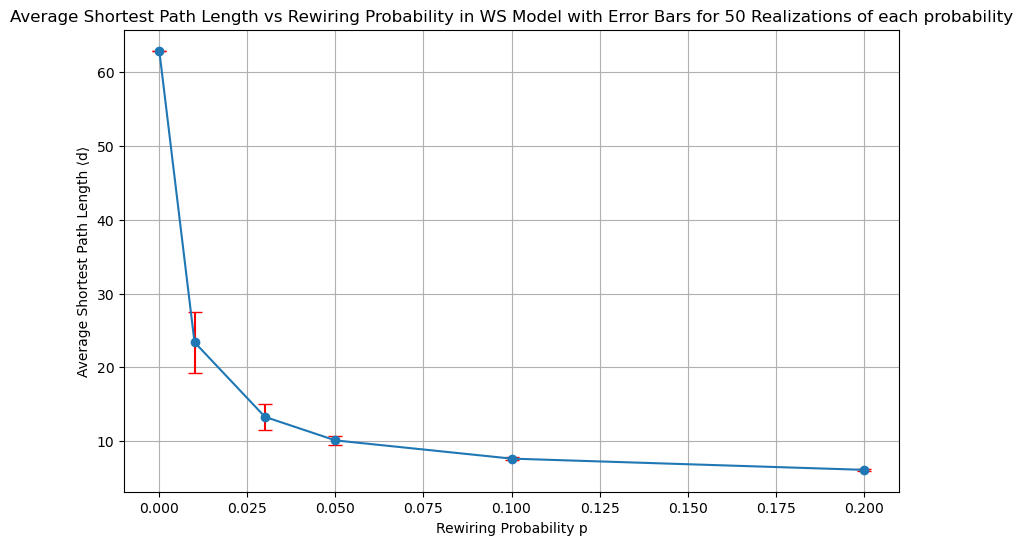

In [6]:
# Plot the average shortest path length as a function of p with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(p, mean_path_lengths, yerr=std_path_lengths, fmt='o-', capsize=5, ecolor='red')
plt.xlabel('Rewiring Probability p')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model with Error Bars for 50 Realizations of each probability')
plt.grid()
plt.show()

- **Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.**

Average shortest path length ⟨d⟩ as a function of the rewiring probability p in the Watts–Strogatz (WS) model. The x-axis shows the rewiring probabilities (p = 0, 0.01, 0.03, 0.05, 0.1, 0.2), and the y-axis shows the average shortest path length between two random nodes. Each blue dot represents the mean value of ⟨d⟩ over 50 realizations of the network for each value of p. The red error bars indicate the standard deviation of ⟨d⟩ across these realizations.

The results show that introducing a tiny bit of "randomness" by making a small amount of rewiring (as little as 1%) drastically reduces the average shortest path length, nearly halving it compared going from p=0 to p=0.01. As p increases, both the mean path length and its variability decrease, as the network approach the behavior of a random network (at p=1). Even though this is the observation, we expect the clustering coefficient to still be high, and therefore not represent a random network. With even a small amount of pertubations of the links, we gain access to different clusters in the network, and therefore deminish the shortest distance to nodes further away. This is what is describes as the small-world effect.

### Week 3 Part 2.a)

**Exercises: BA edition.**
- **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**
  - Anomalous Regime (γ ≤ 2)
    - The exponent $1/(γ−1)$ in (4.18), $k_{max} = k_{min} N^{1/(γ−1)}$, is larger than one. Hence, the number of links connected to the largest hub grows faster than the size of the network. This means that for sufficiently large $N$, the degree of the largest hub must exceed the total number of nodes in the network, so it will eventually run out of nodes to connect to.
    - hubs grow unrealistically fast and the model breaks down.
  - Scale-Free Regime (2 < γ < 3)
    - Ultra small world
    - For γ = 2, $k_{max} \sim N$
    - Here the mean of the degree distribution is finite, but higher moments such as the variance are not finite.  
    - scale-free networks with heavy tails; hubs dominate, variance diverges.
  - Random Network Regime (γ > 3)
    - Small world
    - Indistinguishable from a random network
    - For γ > 3 both the first and the second moments are finite.  
    - resembles a random network; hubs are less important, variance is finite.
- **What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**
  - Sublinear Preferential Attachment (0 < α < 1)
    - For any α > 0, new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution. Instead, in this regime the degrees follow a stretched exponential distribution.
    - weak bias, no scale-free structure; degree distribution is stretched exponential
  - Linear Preferential Attachment (α = 1)
    - Scale-free
    - This corresponds to the Barabási–Albert model, hence the degree distribution follows a power law.
    - classic BA model; power-law degree distribution, scale-free networks.
  - Superlinear Preferential Attachment (α > 1)
    - For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-get-richer process.
    - The earliest nodes become super hubs and all subsequent nodes link to them.
    - a few super-hubs capture almost all links


### Week 3 Part 2.b)
**Exercises: create our own Barabasi-Albert model**

Well documented code that shows how we create the network:

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

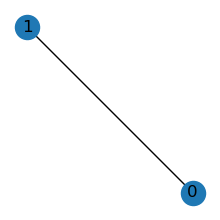

In [8]:
# single link graph
G = nx.Graph()
G.add_edge(0, 1)

# plot
plt.figure(figsize=(2,2))
nx.draw(G, with_labels=True)

In [9]:
# add 100 nodes, connecting one of the existing nodes in proportion to their degree

# Generate a list of all edges and flatten it
nodes = []
for edge in G.edges():
    for node in edge:
        nodes.append(node)

for new_node in range(2, 100):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)

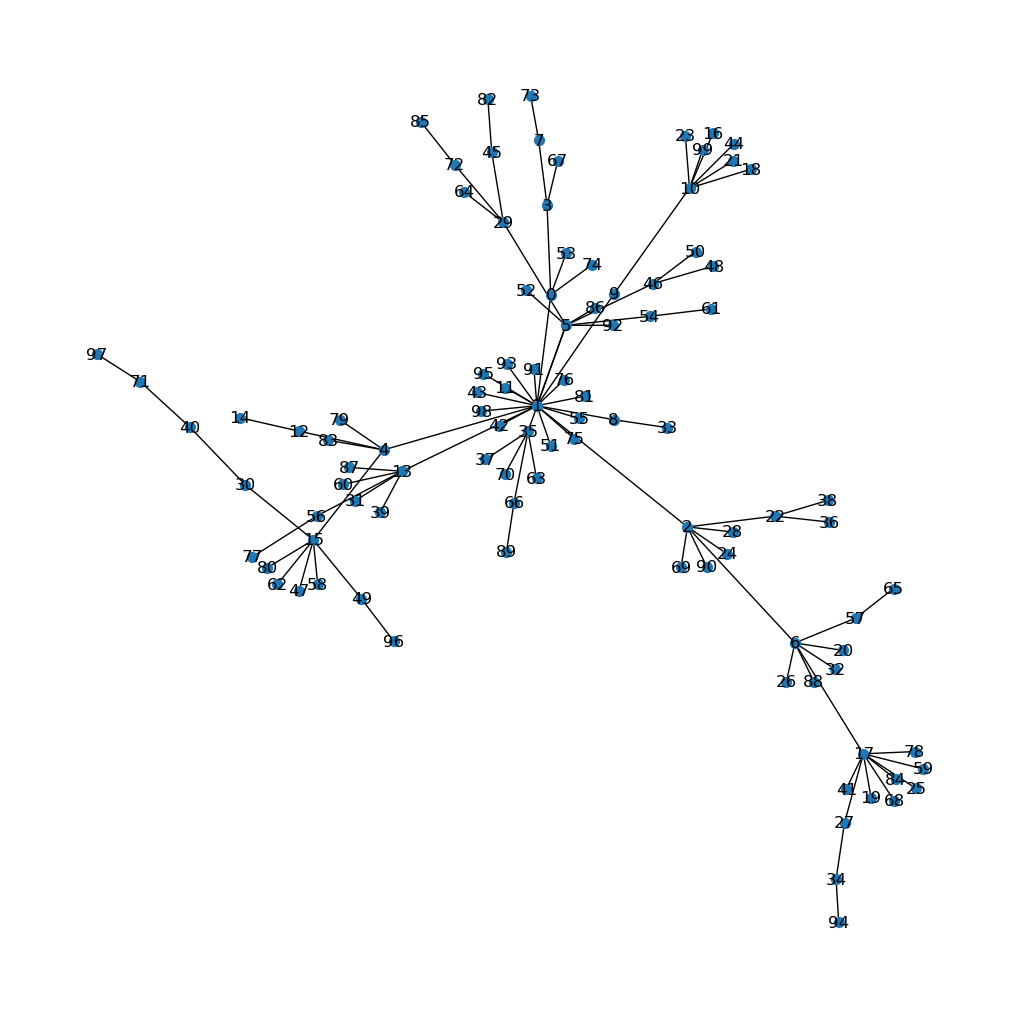

In [10]:
#Plot the network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50)
plt.show()

In [11]:
# Add more nodes until you have a 5000 node network.
for new_node in range(101, 5000):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)

In [12]:
# What's the maximum and minimum degree?
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)
print(f"Maximum degree: {dmax}")
print(f"Minimum degree: {dmin}")

Maximum degree: 117
Minimum degree: 1


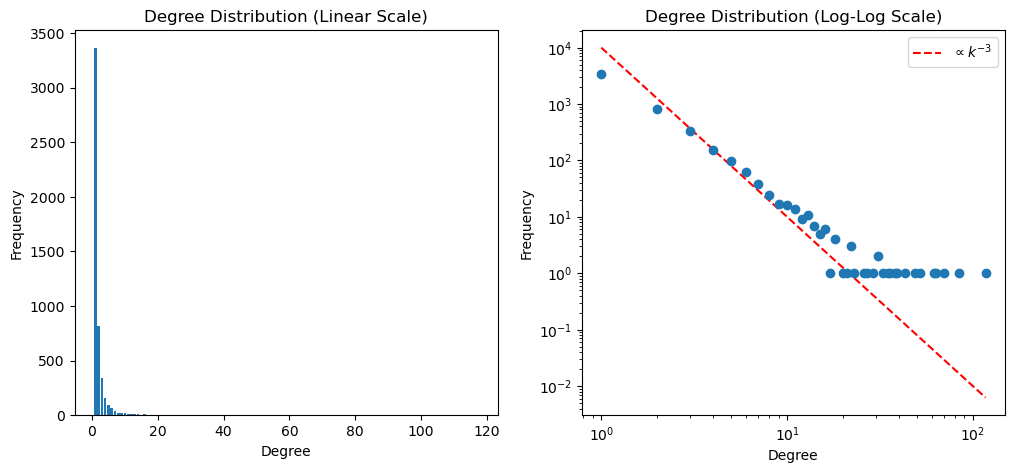

In [13]:
# Now, bin the degree distribution using numpy.histogram.
hist, bin_edges = np.histogram(degree_sequence, bins=range(dmin, (dmax+1) +1)) # +1 to include dmax as the right bin edge in the last bin

# Plot the distribution. Plot it with both linear and log-log axes.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
x = np.array(bin_edges[:-1],dtype=float)
x = x[x > 0]  
y = 10000 * x**-3
plt.loglog(x, y, linestyle='--', color='red', label=r'$\propto k^{-3}$')
plt.legend()
plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

The left panel in the above plot shows the degree distribution on a linear scale generated by the BA model. The right panel shows the degree distribution on a log-log scale, with a red dotted line added corresponding to the degree exponent $\gamma = 3$.

We observe that the majority of the nodes has a low degree, with a few nodes being hubs having a very high degree. When plotted on a log-log scale we get approximately a straight line consistent of a power law with $\gamma = 3$. This in turn indicates that the network is scale free, meaning that that the degree distribution doesnt center around a average node degree but follows a heavy-tailed distribution, as a result of the *preferential attatchment effect*


# Assignment 1.2: Stats and visualization of the Rock Music Network

### Week 4 Part 2.2
**Exercise: Explain your process in words**

- **First, simply describe the steps of the process (what you did, step by step)**

    1. We copied the text from the wikipage containing all the bands and made a text file (as described in the exercise from week 4). 
    2. From this text file, we extracted all the wiki-links of bands and saved them in an array. This is now an array of all the mainstream Rock-bands since the original wikipage was just a list of these.  
    3. We looped over the array of bands and downloaded the wikipages for each band, using an API. We made sure that we used "legal" urls for them (adding underscores and removing characters that is not allowed in a url). In this step we also removed one link from the list of bands that was not a band, this was a link to the wiki page AllMusic, this was done manually.
    4. Then we made a directed graph containing the bands as nodes.
    5. Lastly, looping through each band, a directed edge was added from the band to every other band that was linked on the wiki-page. We did this by finding all links on the current bandpage, and adding them to an array if the link reffered to another rock band (a node in the graph). Then we added edges to all bands in this link-array. 
    6. Furthermore, in the loop over the bands, the word count of the wikipage was added as an atribute of the node.
    7. Finally, we removed all nodes that has no in/out-degree, i.e they are not connected to the rest of the network, and only kept the largest component. 
- **Then, write a short section about which part of the process that was most difficult**
  - It was definitly difficult to figure out the technical part of extracting all the wikipedia pages. As, soon as they were downloaded and we figure out how to access them, the work flow was better and more intuitive.

- **Next write a short section about how you used LLMs to help you**
  - We used the LLM a lot to help figure out what smart package attributes that could help us and how they worked. We especially used a LLM when trying to figure out how we could clean up the names of the bands, to use them in the url and when making filenames.

- **Finally, compose a short section about what you would do differently if you had to do it again**
  - If we had to do it again, we would figure out a way to check if we extracted all the bands and the links we needed from the wikipedia pages. Mostly we would try to set up some test cases before, so we were sure that the Regular expressions and the API scraped and got everything we needed and didn't catch links and misunderstood text as links.
  - We would like our code to not catch the AllMusic link that was in the description of the band Kiss in the original list of bands.
  - We would try to make the files more readable, when saved as a .txt file.
  - Furthermore we would try without using the help of the LLM's, to test if we understood everything of the parts it helped us create.



### Week 4 Part 2.3 

**Exercise: Simple network statistics and analysis**

- **What is the number of nodes in the network?**
- **More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)**
- **Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**

In [31]:
# Loading the graph from Github as decribed in the exercise
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment1/rock_music_graph1.graphml"# Loading graph from a GraphML file from a URL

data = requests.get(url).text   # decode to string, not bytes
G = nx.parse_graphml(data)


 Graph loaded with 488 nodes and 7177 links

Max in-degree: 117, Min in-degree: 0
Max out-degree: 71, Min out-degree: 0


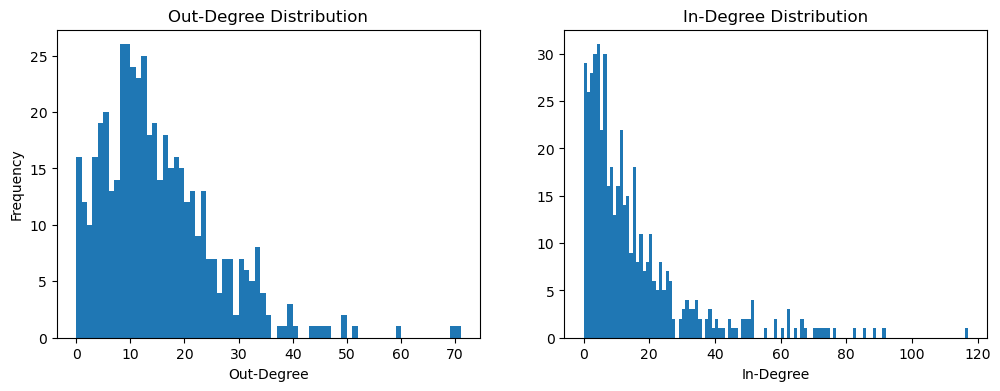

In [33]:
# Nodes and links
print("\n Graph loaded with {} nodes and {} links\n".format(G.number_of_nodes(), G.number_of_edges()))

# Out and in degrees of all nodes in G
out_degrees = [d for n, d in G.out_degree()]
in_degrees = [d for n, d in G.in_degree()]

# out and in degree statistics plotted side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(out_degrees, bins=range(max(out_degrees)+1))
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

# plot in degree statistics
plt.subplot(1, 2, 2)
plt.hist(in_degrees, bins=range(max(in_degrees)+1))
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')

# Max and min in and out degree
max_in_degree = max(in_degrees)
min_in_degree = min(in_degrees)
max_out_degree = max(out_degrees)
min_out_degree = min(out_degrees)
print(f"Max in-degree: {max_in_degree}, Min in-degree: {min_in_degree}")
print(f"Max out-degree: {max_out_degree}, Min out-degree: {min_out_degree}")

In the plots above, we observe that there is a difference in the out and in degree distributions. 

There are more outliers in the in-degree distribution, which means that there is a couple of bands, that a lot of other bands link to. This makes sense, as there are many bands that are more likely to have links to them coming from other wiki-pages, because they are more famous and/or have been active for a longer period of time. These 4-6 bands act as hubs, having in-degree of 80 or above. 

Both distributions are heavy-tailed indicating a power-law-structure, but the in-degree distribution are more skewed. Meaning that the in degree distribution are centered closer to zero, and that the majority of the bands has a lower in-degree than out-degree. Meaning many link to more than one other band, while are not linked to by other bands or only by few. This makes sense, as it is probably more likely for a band to link to a big/famous band than a quite unknown band. This also suports the fact that there a few nodes with big in-degree.


- **Compare the out-degree distribution to a random network with the same number of nodes and links.**
- **Compare the in-degree distribution to a scale-free network with the same number of nodes.**

Number of edges: 6769


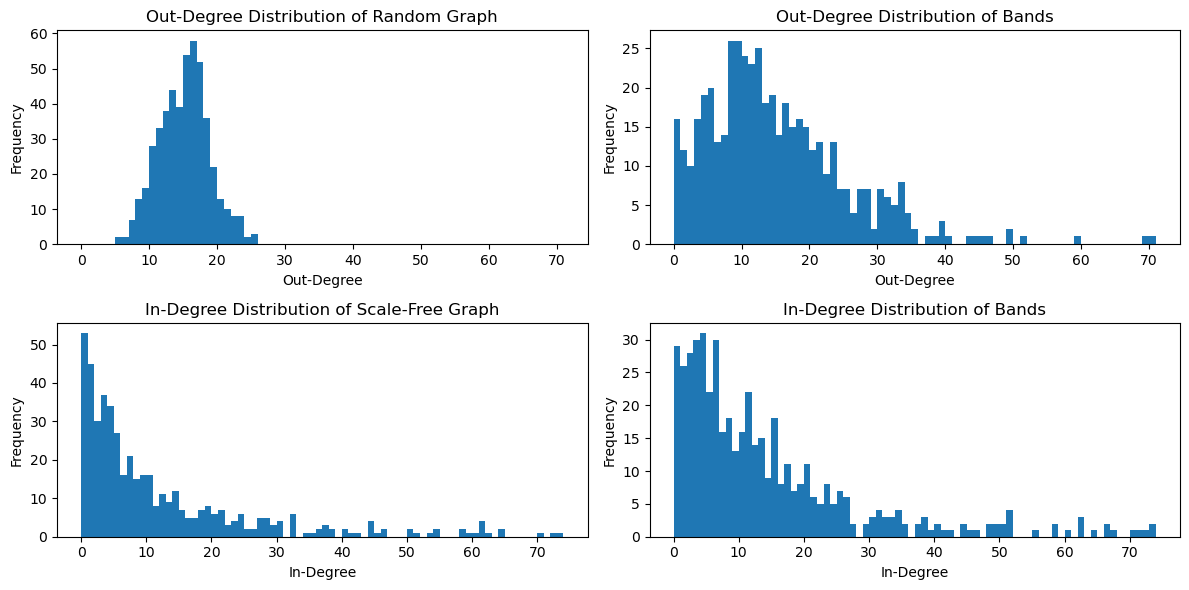

In [34]:
# Random network with same number of nodes and edges as G
# og her
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# random directed graph
G_random = nx.gnm_random_graph(num_nodes, num_edges, directed=True, seed=1234)
random_out_degrees = [d for n, d in G_random.out_degree()]

# scale-free network

G_scale_free = nx.DiGraph()
G_scale_free.add_edge(0, 1)

for i in range(2, num_nodes):
    # List of all nodes proportional to their degree 
    # (by flattening the edge list, the node will appear as many times as its degree)
    node_options = np.array(G_scale_free.edges()).flatten()
    # Select appropriate number of target nodes for the new node (to match edge count of G)
    new_node = i
    num_connections = min(int(round(num_edges/num_nodes)), len(node_options))  # Ensure we don't sample more nodes than available
    target_nodes = random.sample(list(node_options), k=num_connections)
    for target_node in target_nodes:
        G_scale_free.add_edge(new_node, target_node)
    
scale_free_in_degrees = [d for n, d in G_scale_free.in_degree()]

# number of edges 
num_edges = G_scale_free.number_of_edges()
print(f"Number of edges: {num_edges}")

# Plotting the out-degree distribution of the random graph and in-degree distribution of the scale-free graph side by side
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(random_out_degrees, bins=range(max(out_degrees)+1)) # match bins with out-degrees of G
plt.title('Out-Degree Distribution of Random Graph')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
plt.hist(out_degrees, bins=range(max(out_degrees)+1))
plt.title('Out-Degree Distribution of Bands')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3)
plt.hist(scale_free_in_degrees, bins=range(75)) # match bins with in
plt.title('In-Degree Distribution of Scale-Free Graph')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.hist([d for d in in_degrees if d < 75], bins=range(75)) # 75 bins
plt.title('In-Degree Distribution of Bands')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Important to note, the generated scale-free network is a Barabási–Albert network, which we have modified to make the number of edges match. We have chosen to add an apropriate number of edges in each iteration, such that the number of edges in the end will match our original band network. 

The out degree distribution of the random network (Erdos-Renyi) looks very different from the original network. The center of the distributions are both around 15, but the distribution of the random network is steeper, more concentrated and without outliers. This means, that there are no big hubs in the random network and the variance in out degree is small compared to the band network. 

The in degree distribution of the scale-free network (Barabasi-Albert) looks similar to the band network in terms of shape, though the scale-free network is a little more steep and more concentrated around zero (has frequency 50 for in-deg. = 0). The band network has a broader "middle range" of in degree nodes compared to the scale free network that decays faster. This “plateau” in the real data is where the medium-popularity bands are linking to peers of similar status, which pure preferential attachment (BA) does not generate. The BA model’s steeper decay therefore underestimates the number of mid-range in-degree nodes seen in the band network. 

- **Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?**
- **What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?**

In [36]:
# 5 max in-degrees
top_in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by in-degree:")
for node, degree in top_in_degrees:
    print(f"{node}: {degree}")

# 5 max out-degrees
top_out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 nodes by out-degree:")
for node, degree in top_out_degrees:
    print(f"{node}: {degree}")

# 10 pages with the longest wiki entries
top_word_counts = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]
print("\nTop 10 pages with the longest wiki entries:")
for node, data in top_word_counts:
    print(f"{node}: {data['word_count']} words")

Top 5 nodes by in-degree:
Led_Zeppelin: 117
Bob_Dylan: 91
Queen_(band): 88
Metallica: 85
David_Bowie: 82

Top 5 nodes by out-degree:
Alice_in_Chains: 71
Deep_Purple: 69
Black_Sabbath: 59
Def_Leppard: 51
Bryan_Adams: 49

Top 10 pages with the longest wiki entries:
Guns_N'_Roses: 61420 words
Coldplay: 47702 words
Marilyn_Manson_(band): 46611 words
Queen_(band): 46579 words
The_Rolling_Stones: 44638 words
U2: 43605 words
Paul_McCartney: 43542 words
Bob_Dylan: 43184 words
David_Bowie: 43025 words
Elton_John: 41876 words


#### Top 5 Most Connected Performers

- **Highest in-degree (most linked-to):**
    1. Led Zeppelin (117)
    2. Bob Dylan (91)
    3. Queen (88)
    4. Metallica (85)
    5. David Bowie (82)

- **Highest out-degree (most linking to others):**
    1. Alice in Chains (70)
    2. Deep Purple (68)
    3. Black Sabbath (59)
    4. Def Leppard (51)
    5. Guns N' Roses (50)

These results are expected as the bands with the highest in-degree are iconic and influential, and we would expect them to be referenced by other band pages often. The bands on the list above with highest out-degree are bands that have extensive discographies and histories, which might be why they are linking to a lot of other performers.

#### 10 Pages with the Longest Wiki Entries
1. Guns N' Roses
2. Coldplay
3. Marilyn Manson (band)
4. Queen (band)
5. The Rolling Stones
6. U2
7. Paul McCartney
8. Bob Dylan
9. David Bowie
10. Elton John

These bands and artists are all famous and have long, detailed Wikipedia pages, reflecting their impact and popularity, and why some of them are repetitions from the two degree lists above. There is a notable overlap between bands with the highest degree (most connections in the network) and those with the longest Wikipedia pages. This is probably because highly popular bands tend to be referenced by many other bands (high in-degree) and have extensive histories and discographies, which results in longer, more detailed Wikipedia entries which could create more references to other bands (high out-degree). This makes them as central hubs in the network, and we can see this tendency above.

### Week 4 Part 3: Visualizing the networks

**Exercise: Let's build a simple visualization of the network**

- **For the sake of the visualisation, let's convert our network to undirected graph (tip: There is a NetworkX command to help you).Note: Keep the directed graph, we will use it in the following exercises.**

- **Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network. (You can find background on the algorithms here.)**

- **Set up your plot so that node-size depends on the node degree.**

- **Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)**

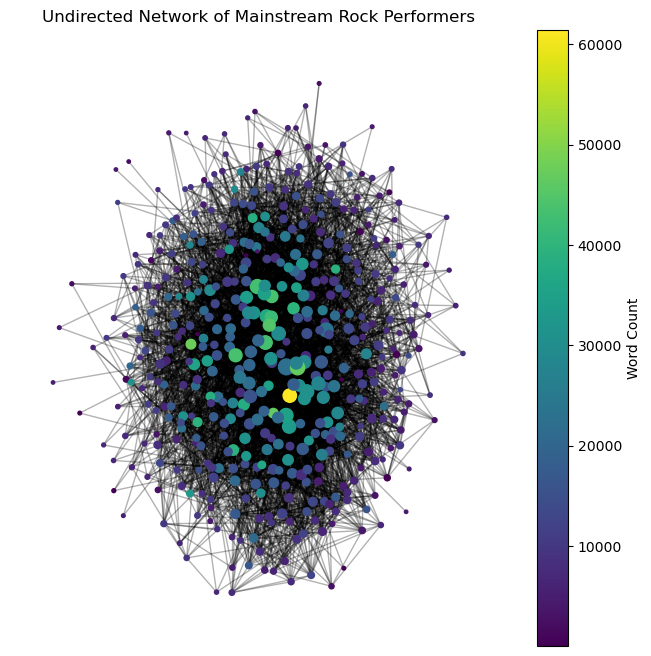

In [37]:
# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# plot the undirected graph
plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
pos = nx.kamada_kawai_layout(G_undirected)
# node sizes based on degree

node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

Above is the original network visualised as a undirected graph. The size of the nodes depends on the degree (the high degree the bigger the node). The color of the node depends on the word count, as seen on the bar to the right (the lighter the higher word count).

The graph is evidently dense and highly connected, making it hard get an overview and see where edges start and end. There is no visual fragmentation into separate clusters.